In [41]:
import uproot3 as uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [42]:
res_9337 = "../output/residuals/Run_2/cosmics_timing_residuals_t9301_from9337_offpmts_20231012.csv"
res_10085 = "../output/residuals/Run_2/cosmics_timing_residuals_t9773_from10085_offpmts_20231012.csv"
res_9730 = "../output/residuals/Run_2/cosmics_timing_residuals_t9628_from9730_offpmts_20231012.csv"

In [43]:
Nres_9337 = "../output/residuals/Run_2/run9337_residuals_test8ns.csv"
Nres_10085 = "../output/residuals/Run_2/run10085_residuals_test8ns.csv"
Nres_9730 = "../output/residuals/Run_2/run9730_residuals_test8ns.csv"

In [44]:
df9337 = pd.read_csv(res_9337)
df10085 = pd.read_csv(res_10085)
df9730 = pd.read_csv(res_9730)
Ndf9337 = pd.read_csv(Nres_9337)
Ndf10085 = pd.read_csv(Nres_10085)
Ndf9730 = pd.read_csv(Nres_9730)

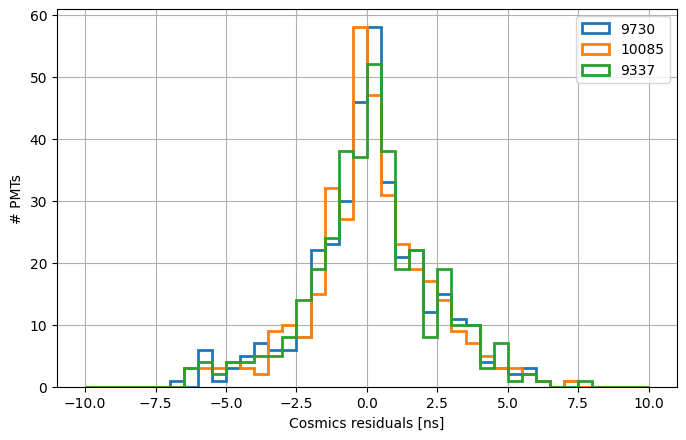

In [45]:
fig = plt.figure(figsize=(8,5),dpi=100)

mi,ma = -10.,10.
b = 0.5
n = int((ma-mi)/b)
plt.hist(df9730["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step",label="9730")
plt.hist(df10085["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step",label="10085")
plt.hist(df9337["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step", label="9337")

plt.grid()
plt.xlabel("Cosmics residuals [ns]")
plt.ylabel("# PMTs")
plt.legend()
plt.show()

In [46]:
def plot(run, df, Ndf):

    fig = plt.figure(figsize=(8,5),dpi=100)

    mi,ma = -10.,10.
    b = 0.5
    n = int((ma-mi)/b)
    plt.hist(df["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="bar",
         label="w/ 8ns delay for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(df["mean_residual_ns"].to_numpy()),np.std(df["mean_residual_ns"].to_numpy())))
    plt.hist(Ndf["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step",
         label="w/o 8ns delay for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(Ndf["mean_residual_ns"].to_numpy()),np.std(Ndf["mean_residual_ns"].to_numpy())))

    plt.grid()
    plt.title("Run {} (including HW + laser)".format(run))
    plt.xlabel("Cosmics residuals")
    plt.ylabel("# PMTs")
    plt.legend()
    plt.show()

In [47]:
# The fit function
def gaus(x,a,mean,sigma):
    return a*np.exp(-(x-mean)**2/(2*sigma**2))

# The fit strategy
def fitGaussian(hdf, target='mean_residual_ns', BINSIZE=0.5,RMIN=-10.0,RMAX=10., p0=(0.1, 1.)):

    nbins=int((RMAX-RMIN)/BINSIZE)
    ys,edges = np.histogram(hdf[target],bins=nbins,range=(RMIN,RMAX))
    xs=np.array([edges[i]+0.5*(edges[i+1]-edges[i]) for i in range(len(ys))])

    param = [np.max(ys), p0[0], p0[1] ]
    bounds = np.array([(param[0]*0.5,param[0]*1.5),
              (param[1]*0.2,param[1]*1.3),
              (param[2]*0.1,param[2]*1.4)])
    
    param,pcov = curve_fit(gaus, xs, ys, p0=param, bounds=(bounds[:,0],bounds[:,1]) )
    param_errors = np.diag(pcov)**0.5
    
    return xs, ys, param, param_errors

def plot_fit(run, df, Ndf):

    fig = plt.figure(figsize=(8,5),dpi=100)

    mi=-5.
    ma=5.
    b=0.3
    n= int((ma-mi)/b)
    
    xs1, ys1, param1, param_errors1 = fitGaussian(df,BINSIZE=b,RMIN=mi,RMAX=ma)
    xs2, ys2, param2, param_errors2 = fitGaussian(Ndf,BINSIZE=b,RMIN=mi,RMAX=ma)
    xss = np.arange(mi,ma,0.1)
    
    plt.hist(df["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="bar",
         label="w/ 8ns delay\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(df["mean_residual_ns"].to_numpy()),np.std(df["mean_residual_ns"].to_numpy())))
    plt.plot(xss,gaus(xss,*param1),"-.",color="darkblue",lw=3,
             label="$\mu$: {:.2f} ns\n$\sigma$: {:.2f} ns".format(param1[1],param1[2]))
    
    plt.hist(Ndf["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step",
         label="w/o 8ns delay\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(Ndf["mean_residual_ns"].to_numpy()),np.std(Ndf["mean_residual_ns"].to_numpy())))
    plt.plot(xss,gaus(xss,*param2),"-.",color="red",lw=3,
        label="$\mu$: {:.2f} ns\n$\sigma$: {:.2f} ns".format(param2[1],param2[2]))

    plt.grid()
    plt.title("Run {} (including HW + laser + cosmics)".format(run))
    plt.xlabel("Cosmics residuals [ns]")
    plt.ylabel("# PMTs")
    plt.legend()
    plt.show()

## Periodo 1 - Run 9337

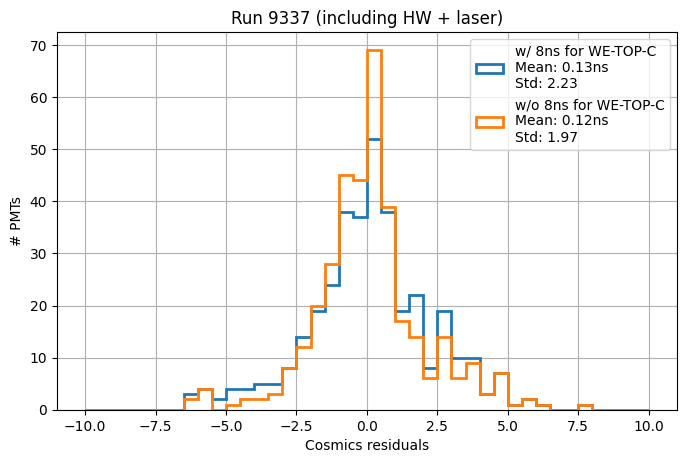

In [48]:
fig = plt.figure(figsize=(8,5),dpi=100)

mi,ma = -10.,10.
b = 0.5
n = int((ma-mi)/b)
plt.hist(df9337["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step",
         label="w/ 8ns for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(df9337["mean_residual_ns"].to_numpy()),np.std(df9337["mean_residual_ns"].to_numpy())))
plt.hist(Ndf9337["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step",
         label="w/o 8ns for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(Ndf9337["mean_residual_ns"].to_numpy()),np.std(Ndf9337["mean_residual_ns"].to_numpy())))

plt.grid()
plt.title("Run 9337 (including HW + laser)")
plt.xlabel("Cosmics residuals")
plt.ylabel("# PMTs")
plt.legend()
plt.show()

In [49]:
df9337.head()

,channel_id,x,y,z,entries,pecut,mean_residual_ns,std_residual_ns,emean_ns
0,0,-371.0701,-76.25,-872.9003,37.0,300.0,3.1575,2.7448,0.0742
1,1,-371.0700,29.35,-872.9002,18.0,300.0,1.4185,1.4582,0.0810
2,2,-371.0700,-129.05,-823.0199,15.0,300.0,1.2772,2.1193,0.1413
3,3,-371.0701,-23.45,-823.0197,48.0,300.0,1.9101,2.2076,0.0460
4,4,-371.0701,82.15,-823.0197,54.0,300.0,-0.0428,2.2558,0.0418


In [50]:
Ndf9337.head()

,channel_id,x,y,z,entries,pecut,mean_residual_ns,std_residual_ns,emean_ns
0,0,-371.0701,-76.25,-872.9003,37.0,300.0,3.1575,2.7448,0.0742
1,1,-371.0700,29.35,-872.9002,18.0,300.0,1.4185,1.4582,0.0810
2,2,-371.0700,-129.05,-823.0199,15.0,300.0,1.2772,2.1193,0.1413
3,3,-371.0701,-23.45,-823.0197,48.0,300.0,1.9101,2.2076,0.0460
4,4,-371.0701,82.15,-823.0197,54.0,300.0,-0.0428,2.2558,0.0418


In [51]:
channels = df9337.join( Ndf9337[["entries", "mean_residual_ns"]], on=["channel_id"], rsuffix="_new", how='inner')
channels["diff"] = channels["mean_residual_ns"]-channels["mean_residual_ns_new"]

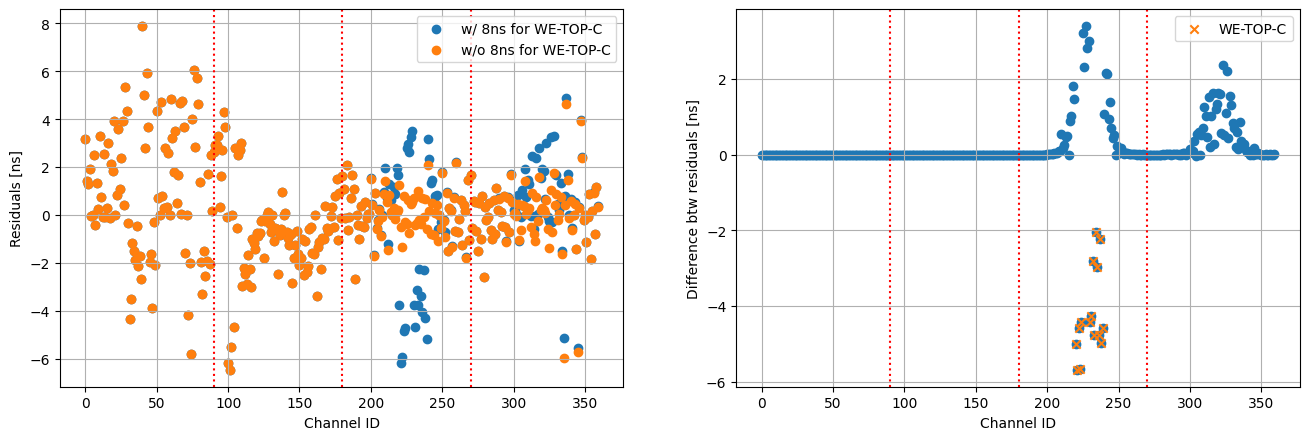

In [52]:
wetopc = [238, 239, 235, 236, 237, 230, 233, 234, 232, 231, 220, 223, 224, 222, 221]
_sel = channels.channel_id.isin(wetopc)

fig, ax = plt.subplots(1,2,figsize=(16,5),dpi=100)

ax[0].scatter( channels["channel_id"], channels["mean_residual_ns"], label="w/ 8ns for WE-TOP-C")
ax[0].scatter( channels["channel_id"], channels["mean_residual_ns_new"], label="w/o 8ns for WE-TOP-C")

ax[0].axvline(x=90,color='red',linestyle="dotted")
ax[0].axvline(x=180,color='red',linestyle="dotted")
ax[0].axvline(x=270,color='red',linestyle="dotted")

ax[0].set_xlabel("Channel ID")
ax[0].set_ylabel("Residuals [ns]")
ax[0].grid()
ax[0].legend()

ax[1].scatter( channels["channel_id"], channels["diff"])
ax[1].scatter( channels[_sel]["channel_id"], channels[_sel]["diff"], marker="x", label="WE-TOP-C")

ax[1].axvline(x=90,color='red',linestyle="dotted")
ax[1].axvline(x=180,color='red',linestyle="dotted")
ax[1].axvline(x=270,color='red',linestyle="dotted")

ax[1].set_xlabel("Channel ID")
ax[1].set_ylabel("Difference btw residuals [ns]")
ax[1].grid()
ax[1].legend()
plt.show()

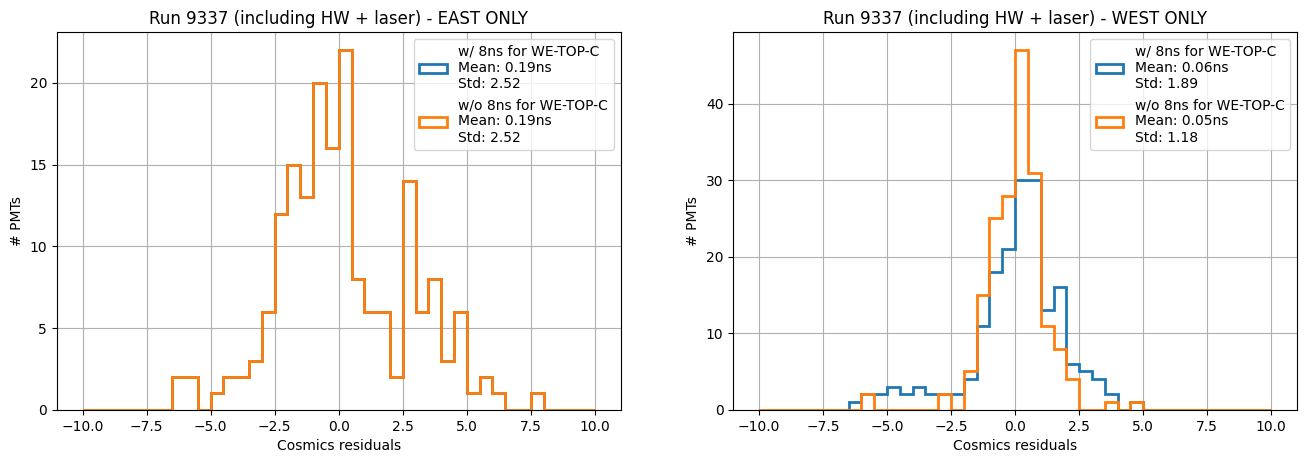

In [53]:
fig, ax = plt.subplots(1, 2,figsize=(16,5),dpi=100)

mi,ma = -10.,10.
b = 0.5
n = int((ma-mi)/b)
_selE = df9337.channel_id<180
_selE1 = Ndf9337.channel_id<180
_selW = df9337.channel_id>=180
_selW1 = Ndf9337.channel_id>=180

ax[0].hist(df9337[_selE]["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step",
         label="w/ 8ns for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(df9337[_selE]["mean_residual_ns"].to_numpy()),np.std(df9337[_selE]["mean_residual_ns"].to_numpy())))
ax[0].hist(Ndf9337[_selE1]["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step",
         label="w/o 8ns for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(Ndf9337[_selE1]["mean_residual_ns"].to_numpy()),np.std(Ndf9337[_selE1]["mean_residual_ns"].to_numpy())))
ax[0].grid()
ax[0].set_title("Run 9337 (including HW + laser) - EAST ONLY")
ax[0].set_xlabel("Cosmics residuals")
ax[0].set_ylabel("# PMTs")
ax[0].legend()

ax[1].hist(df9337[_selW]["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step",
         label="w/ 8ns for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(df9337[_selW]["mean_residual_ns"].to_numpy()),np.std(df9337[_selW]["mean_residual_ns"].to_numpy())))
ax[1].hist(Ndf9337[_selW1]["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step",
         label="w/o 8ns for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(Ndf9337[_selW1]["mean_residual_ns"].to_numpy()),np.std(Ndf9337[_selW1]["mean_residual_ns"].to_numpy())))
ax[1].grid()
ax[1].set_title("Run 9337 (including HW + laser) - WEST ONLY")
ax[1].set_xlabel("Cosmics residuals")
ax[1].set_ylabel("# PMTs")
ax[1].legend()

plt.show()

In [54]:
import sqlite3
def readSqlitedb(database="/cvmfs/icarus.opensciencegrid.org/products/icarus/icarus_data/v09_78_00/icarus_data/database/ChannelMapICARUS_20230829.db", table="pmt_placements"):

    # Read sqlite query results into a pandas DataFrame
    con = sqlite3.connect(database)
    df = pd.read_sql_query("SELECT * from {}".format(table), con)
    con.close()
    return df

def getBoards():
    geo = readSqlitedb()
    boards = geo.digitizer_label.to_numpy()
    return np.unique(boards)

def getChannelsFromBoard(board):
    geo = readSqlitedb()
    channels = geo[geo.digitizer_label==board].channel_id.to_numpy()
    return channels

def getBoardFromChannel(channel):
    geo = readSqlitedb()
    board = geo[geo.channel_id==channel].digitizer_label.values[0]
    return board

def getChannelFromPMTid(pmt):
    geo = readSqlitedb()
    channel = geo[geo.pmt_id==pmt].channel_id.values[0]
    return channel

In [55]:
print( getChannelsFromBoard("EE-BOT-A") )

[48 49 45 46 47 38 39 35 36 37 30 33 34 32 31]


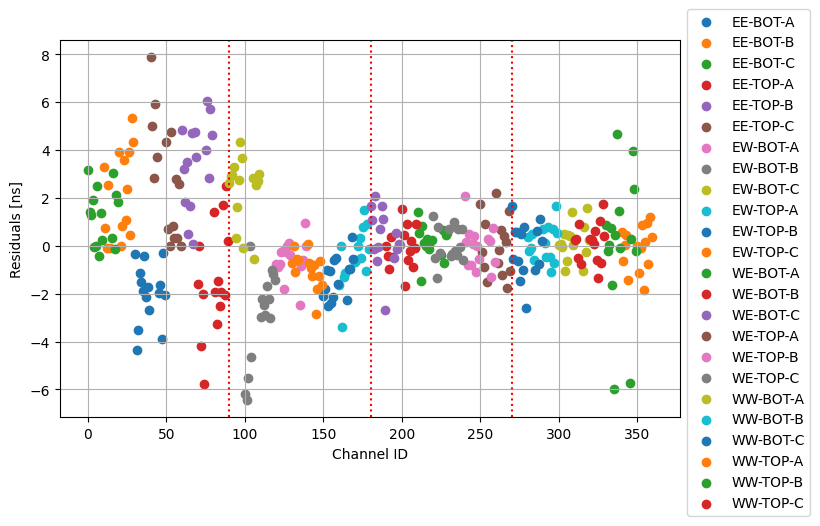

In [56]:
boards = getBoards()

fig = plt.figure(figsize=(8,5),dpi=100)
for b in boards:
    
    c = getChannelsFromBoard(b)
    _sel = channels.channel_id.isin(c)

    #plt.scatter( channels[_sel]["channel_id"], channels[_sel]["mean_residual_ns"], label=b)
    plt.scatter( channels[_sel]["channel_id"], channels[_sel]["mean_residual_ns_new"], label=b)

plt.axvline(x=90,color='red',linestyle="dotted")
plt.axvline(x=180,color='red',linestyle="dotted")
plt.axvline(x=270,color='red',linestyle="dotted")

plt.xlabel("Channel ID")
plt.ylabel("Residuals [ns]")
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.1))
plt.show()

In [57]:
channels.head()

,channel_id,x,y,z,entries,pecut,mean_residual_ns,std_residual_ns,emean_ns,entries_new,mean_residual_ns_new,diff
0,0,-371.0701,-76.25,-872.9003,37.0,300.0,3.1575,2.7448,0.0742,37.0,3.1575,0.0
1,1,-371.0700,29.35,-872.9002,18.0,300.0,1.4185,1.4582,0.0810,18.0,1.4185,0.0
2,2,-371.0700,-129.05,-823.0199,15.0,300.0,1.2772,2.1193,0.1413,15.0,1.2772,0.0
3,3,-371.0701,-23.45,-823.0197,48.0,300.0,1.9101,2.2076,0.0460,48.0,1.9101,0.0
4,4,-371.0701,82.15,-823.0197,54.0,300.0,-0.0428,2.2558,0.0418,54.0,-0.0428,0.0


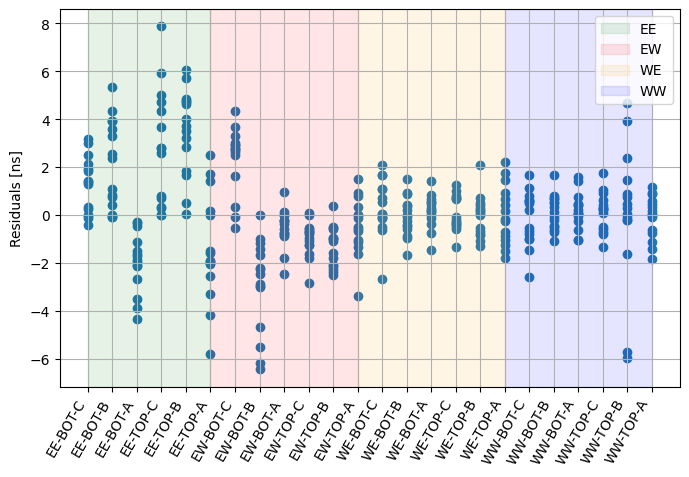

In [58]:
fig = plt.figure(figsize=(8,5),dpi=100)

canali = channels.channel_id.to_numpy()
residui = channels.mean_residual_ns_new.to_numpy()
schede = []
for i, can in enumerate(canali):

    schede.append(getBoardFromChannel(can))
    
plt.scatter( schede, residui )
    
#plt.xlabel("Digitizer board")
plt.ylabel("Residuals [ns]")
plt.grid()
plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")

plt.axvspan(xmin="EE-BOT-C", xmax="EE-TOP-A", color="green", alpha=0.1, label="EE")
plt.axvspan(xmin="EE-TOP-A", xmax="EW-TOP-A", color="red", alpha=0.1, label="EW")
plt.axvspan(xmin="EW-TOP-A", xmax="WE-TOP-A", color="orange", alpha=0.1, label="WE")
plt.axvspan(xmin="WE-TOP-A", xmax="WW-TOP-A", color="blue", alpha=0.1, label="WW")

plt.legend()
plt.show()

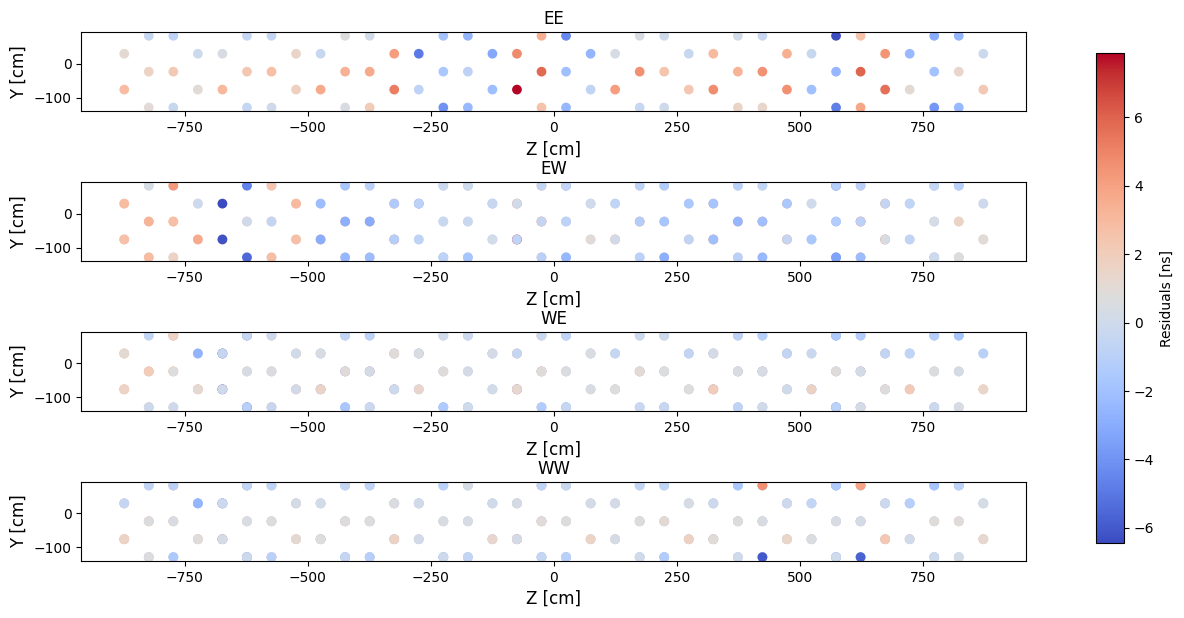

In [59]:
fig, ax = plt.subplots(4,figsize=(14,7),dpi=100)
names = [ "EE", "EW", "WE", "WW"]

_selEE = (channels.channel_id<90)
_selEW = (channels.channel_id<180)
_selWE = (channels.channel_id<270)
_selWW = (channels.channel_id<360)

mini = np.min(channels.mean_residual_ns_new.to_numpy())
maxi = np.max(channels.mean_residual_ns_new.to_numpy())

out = ax[0].scatter(channels[_selEE].z, channels[_selEE].y, c=channels[_selEE].mean_residual_ns_new, cmap='coolwarm')
out = ax[1].scatter(channels[_selEW].z, channels[_selEW].y, c=channels[_selEW].mean_residual_ns_new, cmap='coolwarm')   
out = ax[2].scatter(channels[_selWE].z, channels[_selWE].y, c=channels[_selWE].mean_residual_ns_new, cmap='coolwarm') 
out = ax[3].scatter(channels[_selWW].z, channels[_selWW].y, c=channels[_selWW].mean_residual_ns_new, cmap='coolwarm')

fig.subplots_adjust(right=0.8, hspace=0.9)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
plt.colorbar(out, cax=cbar_ax, label="Residuals [ns]", orientation='vertical', pad=0.01 )

for i in range(0,4): 
    ax[i].set_title(names[i])
    ax[i].set_xlabel("Z [cm]",fontsize=12)
    ax[i].set_ylabel("Y [cm]", fontsize=12) 

plt.show()

# Validation samples

In [21]:
res1 = "../output/residuals/Run_2/run9441_cosmics_timing_residuals.csv"
res2 = "../output/residuals/Run_2/run9595_cosmics_timing_residuals.csv"
Nres1 = "../output/residuals/Run_2/run9441_residuals_test8ns.csv"
Nres2 = "../output/residuals/Run_2/run9595_residuals_test8ns.csv"
df1 = pd.read_csv(res1)
df2 = pd.read_csv(res2)
Ndf1 = pd.read_csv(Nres1)
Ndf2 = pd.read_csv(Nres2)

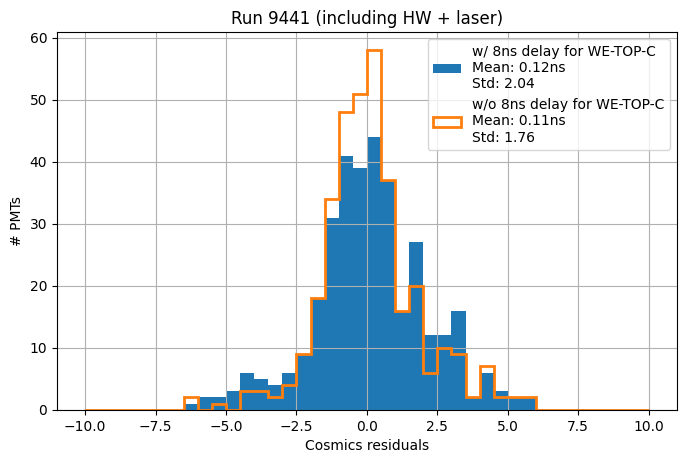

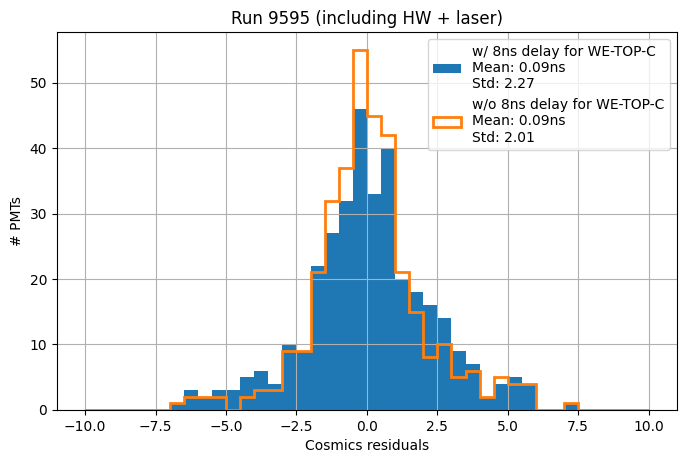

In [22]:
plot(9441,df1,Ndf1)
plot(9595,df2,Ndf2)

## Periodo 2 - Run 9730

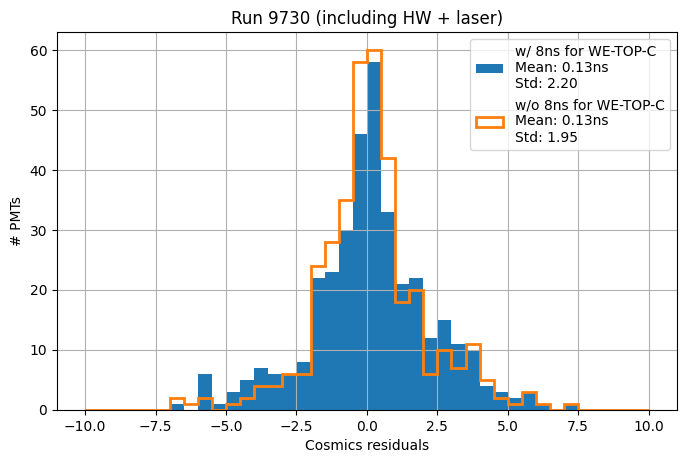

In [23]:
fig = plt.figure(figsize=(8,5),dpi=100)

mi,ma = -10.,10.
b = 0.5
n = int((ma-mi)/b)
plt.hist(df9730["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="bar",
         label="w/ 8ns for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(df9730["mean_residual_ns"].to_numpy()),np.std(df9730["mean_residual_ns"].to_numpy())))
plt.hist(Ndf9730["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step",
         label="w/o 8ns for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(Ndf9730["mean_residual_ns"].to_numpy()),np.std(Ndf9730["mean_residual_ns"].to_numpy())))

plt.grid()
plt.title("Run 9730 (including HW + laser)")
plt.xlabel("Cosmics residuals")
plt.ylabel("# PMTs")
plt.legend()
plt.show()

In [24]:
res3 = "../output/residuals/Run_2/run9688_cosmics_timing_residuals.csv"
res4 = "../output/residuals/Run_2/run9764_cosmics_timing_residuals.csv"
Nres3 = "../output/residuals/Run_2/run9688_residuals_test8ns.csv"
Nres4 = "../output/residuals/Run_2/run9764_residuals_test8ns.csv"
df3 = pd.read_csv(res3)
df4 = pd.read_csv(res4)
Ndf3 = pd.read_csv(Nres3)
Ndf4 = pd.read_csv(Nres4)

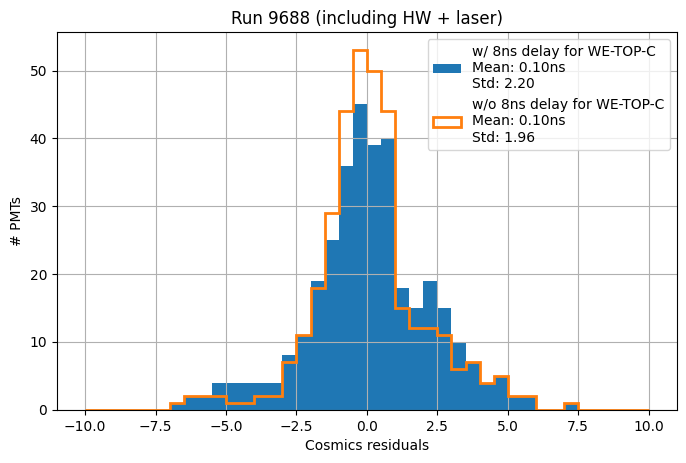

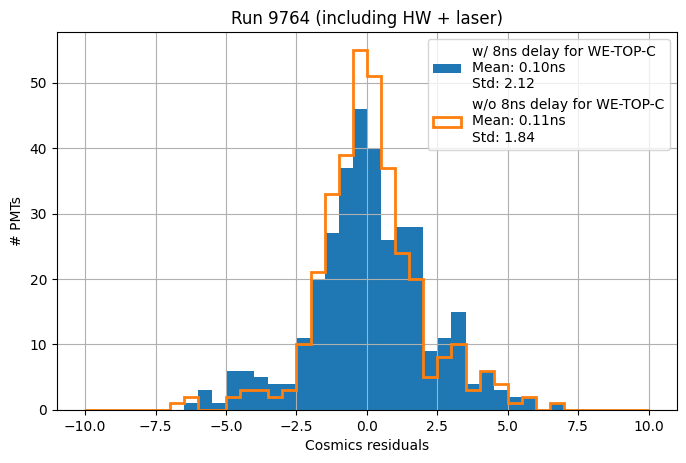

In [25]:
plot(9688,df3,Ndf3)
plot(9764,df4,Ndf4)

In [26]:
channels = df9730.join( Ndf9730[["entries", "mean_residual_ns"]], on=["channel_id"], rsuffix="_new", how='inner')
channels["diff"] = channels["mean_residual_ns"]-channels["mean_residual_ns_new"]

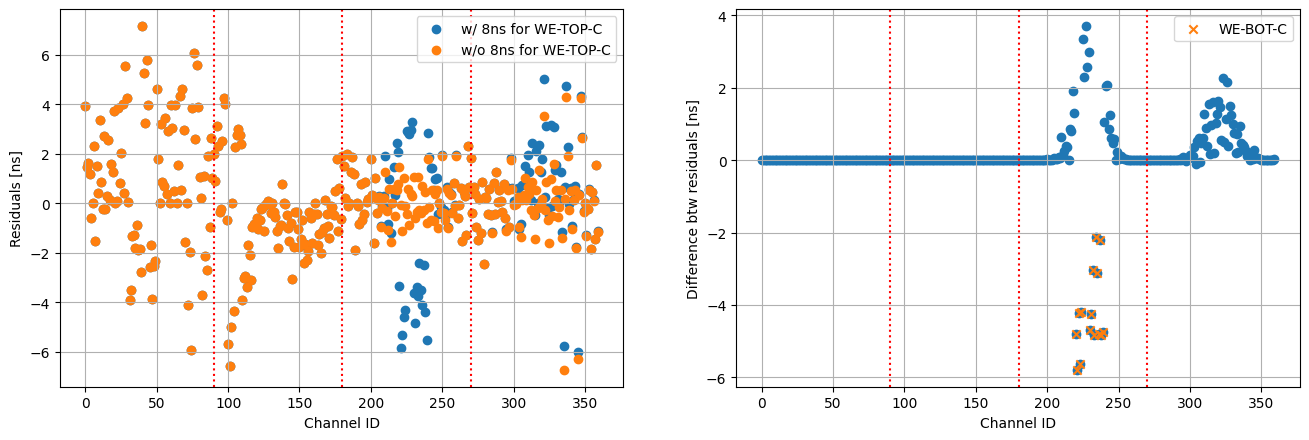

In [27]:
wetopc = [238, 239, 235, 236, 237, 230, 233, 234, 232, 231, 220, 223, 224, 222, 221]
_sel = channels.channel_id.isin(wetopc)

fig, ax = plt.subplots(1,2,figsize=(16,5),dpi=100)

ax[0].scatter( channels["channel_id"], channels["mean_residual_ns"], label="w/ 8ns for WE-TOP-C")
ax[0].scatter( channels["channel_id"], channels["mean_residual_ns_new"], label="w/o 8ns for WE-TOP-C")

ax[0].axvline(x=90,color='red',linestyle="dotted")
ax[0].axvline(x=180,color='red',linestyle="dotted")
ax[0].axvline(x=270,color='red',linestyle="dotted")

ax[0].set_xlabel("Channel ID")
ax[0].set_ylabel("Residuals [ns]")
ax[0].grid()
ax[0].legend()

ax[1].scatter( channels["channel_id"], channels["diff"])
ax[1].scatter( channels[_sel]["channel_id"], channels[_sel]["diff"], marker="x", label="WE-BOT-C")

ax[1].axvline(x=90,color='red',linestyle="dotted")
ax[1].axvline(x=180,color='red',linestyle="dotted")
ax[1].axvline(x=270,color='red',linestyle="dotted")

ax[1].set_xlabel("Channel ID")
ax[1].set_ylabel("Difference btw residuals [ns]")
ax[1].grid()
ax[1].legend()
plt.show()

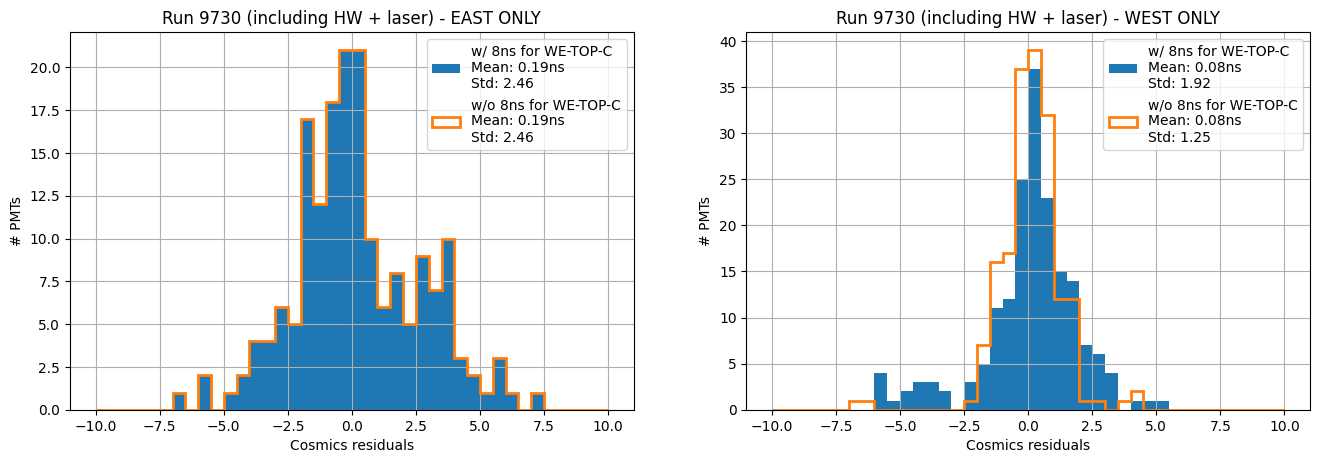

In [28]:
fig, ax = plt.subplots(1, 2,figsize=(16,5),dpi=100)

mi,ma = -10.,10.
b = 0.5
n = int((ma-mi)/b)
_selE = df9730.channel_id<180
_selE1 = Ndf9730.channel_id<180
_selW = df9730.channel_id>=180
_selW1 = Ndf9730.channel_id>=180

ax[0].hist(df9730[_selE]["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="bar",
         label="w/ 8ns for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(df9730[_selE]["mean_residual_ns"].to_numpy()),np.std(df9730[_selE]["mean_residual_ns"].to_numpy())))
ax[0].hist(Ndf9730[_selE1]["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step",
         label="w/o 8ns for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(Ndf9730[_selE1]["mean_residual_ns"].to_numpy()),np.std(Ndf9730[_selE1]["mean_residual_ns"].to_numpy())))
ax[0].grid()
ax[0].set_title("Run 9730 (including HW + laser) - EAST ONLY")
ax[0].set_xlabel("Cosmics residuals")
ax[0].set_ylabel("# PMTs")
ax[0].legend()

ax[1].hist(df9730[_selW]["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="bar",
         label="w/ 8ns for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(df9730[_selW]["mean_residual_ns"].to_numpy()),np.std(df9730[_selW]["mean_residual_ns"].to_numpy())))
ax[1].hist(Ndf9730[_selW1]["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step",
         label="w/o 8ns for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(Ndf9730[_selW1]["mean_residual_ns"].to_numpy()),np.std(Ndf9730[_selW1]["mean_residual_ns"].to_numpy())))
ax[1].grid()
ax[1].set_title("Run 9730 (including HW + laser) - WEST ONLY")
ax[1].set_xlabel("Cosmics residuals")
ax[1].set_ylabel("# PMTs")
ax[1].legend()

plt.show()

## Periodo 3 - Run 10085

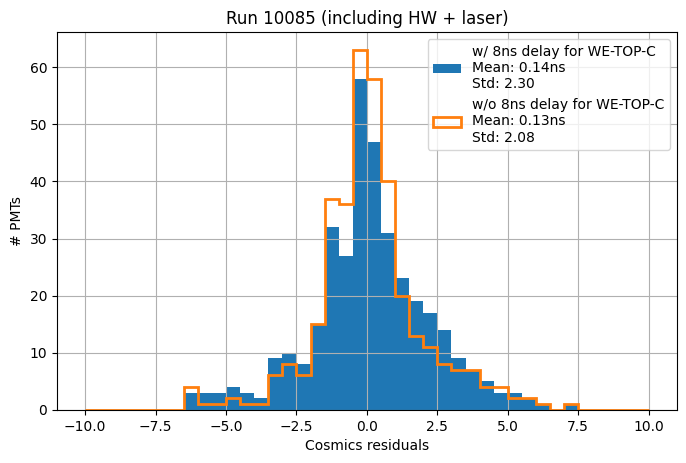

In [29]:
fig = plt.figure(figsize=(8,5),dpi=100)

mi,ma = -10.,10.
b = 0.5
n = int((ma-mi)/b)
plt.hist(df10085["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="bar",
         label="w/ 8ns delay for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(df10085["mean_residual_ns"].to_numpy()),np.std(df10085["mean_residual_ns"].to_numpy())))
plt.hist(Ndf10085["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step",
         label="w/o 8ns delay for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(Ndf10085["mean_residual_ns"].to_numpy()),np.std(Ndf10085["mean_residual_ns"].to_numpy())))

plt.grid()
plt.title("Run 10085 (including HW + laser)")
plt.xlabel("Cosmics residuals")
plt.ylabel("# PMTs")
plt.legend()
plt.show()

In [30]:
res5 = "../output/residuals/Run_2/run9840_cosmics_timing_residuals.csv"
res6 = "../output/residuals/Run_2/run9974_cosmics_timing_residuals.csv"
Nres5 = "../output/residuals/Run_2/run9840_residuals_test8ns.csv"
Nres6 = "../output/residuals/Run_2/run9974_residuals_test8ns.csv"
df5 = pd.read_csv(res5)
df6 = pd.read_csv(res6)
Ndf5 = pd.read_csv(Nres5)
Ndf6 = pd.read_csv(Nres6)

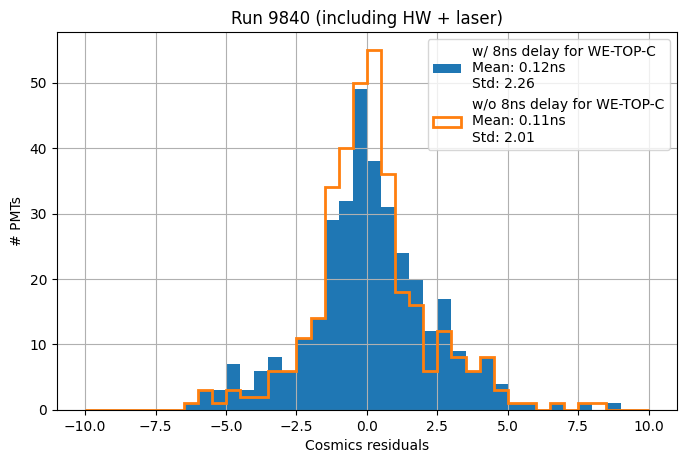

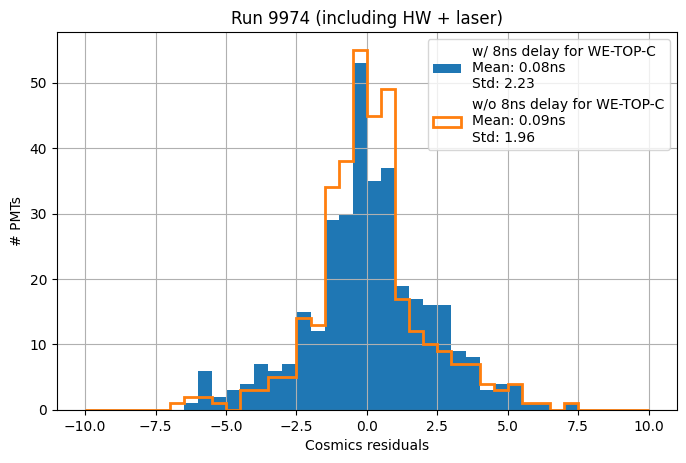

In [31]:
plot(9840,df5,Ndf5)
plot(9974,df6,Ndf6)

In [32]:
channels = df10085.join( Ndf10085[["entries", "mean_residual_ns"]], on=["channel_id"], rsuffix="_new", how='inner')
channels["diff"] = channels["mean_residual_ns"]-channels["mean_residual_ns_new"]

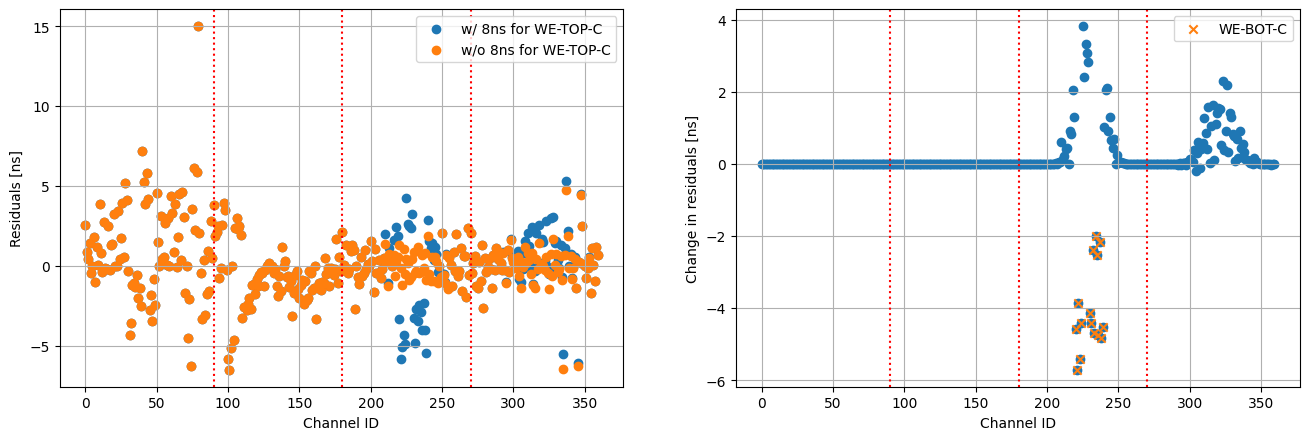

In [33]:
wetopc = [238, 239, 235, 236, 237, 230, 233, 234, 232, 231, 220, 223, 224, 222, 221]
_sel = channels.channel_id.isin(wetopc)

fig, ax = plt.subplots(1,2,figsize=(16,5),dpi=100)

ax[0].scatter( channels["channel_id"], channels["mean_residual_ns"], label="w/ 8ns for WE-TOP-C")
ax[0].scatter( channels["channel_id"], channels["mean_residual_ns_new"], label="w/o 8ns for WE-TOP-C")

ax[0].axvline(x=90,color='red',linestyle="dotted")
ax[0].axvline(x=180,color='red',linestyle="dotted")
ax[0].axvline(x=270,color='red',linestyle="dotted")

ax[0].set_xlabel("Channel ID")
ax[0].set_ylabel("Residuals [ns]")
ax[0].grid()
ax[0].legend()

ax[1].scatter( channels["channel_id"], channels["diff"])
ax[1].scatter( channels[_sel]["channel_id"], channels[_sel]["diff"], marker="x", label="WE-BOT-C")

ax[1].axvline(x=90,color='red',linestyle="dotted")
ax[1].axvline(x=180,color='red',linestyle="dotted")
ax[1].axvline(x=270,color='red',linestyle="dotted")

ax[1].set_xlabel("Channel ID")
ax[1].set_ylabel("Change in residuals [ns]")
ax[1].grid()
ax[1].legend()
plt.show()

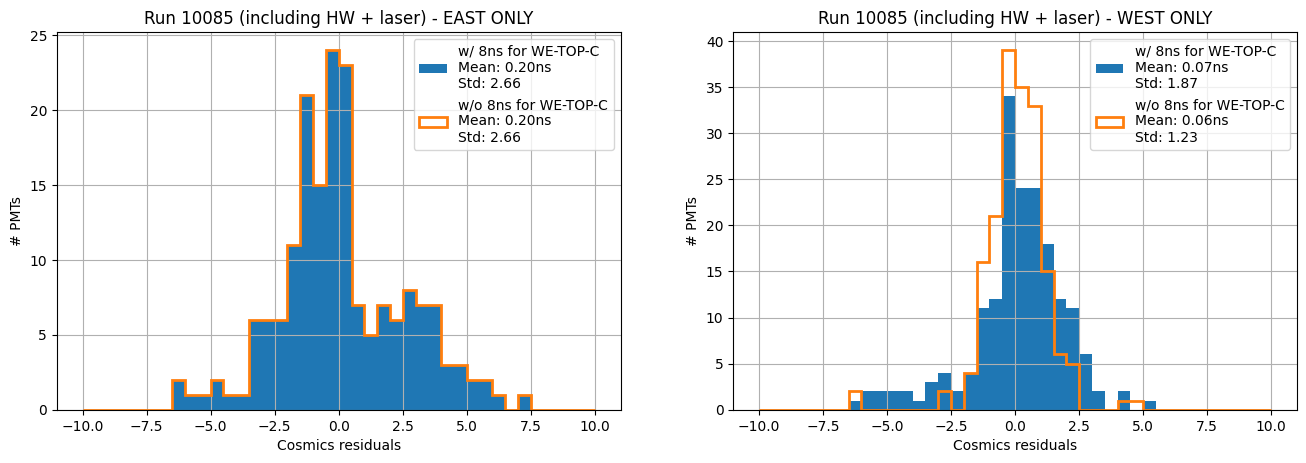

In [34]:
fig, ax = plt.subplots(1, 2,figsize=(16,5),dpi=100)

mi,ma = -10.,10.
b = 0.5
n = int((ma-mi)/b)
_selE = df10085.channel_id<180
_selE1 = Ndf10085.channel_id<180
_selW = df10085.channel_id>=180
_selW1 = Ndf10085.channel_id>=180

ax[0].hist(df10085[_selE]["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="bar",
         label="w/ 8ns for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(df10085[_selE]["mean_residual_ns"].to_numpy()),np.std(df10085[_selE]["mean_residual_ns"].to_numpy())))
ax[0].hist(Ndf10085[_selE1]["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step",
         label="w/o 8ns for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(Ndf10085[_selE1]["mean_residual_ns"].to_numpy()),np.std(Ndf10085[_selE1]["mean_residual_ns"].to_numpy())))
ax[0].grid()
ax[0].set_title("Run 10085 (including HW + laser) - EAST ONLY")
ax[0].set_xlabel("Cosmics residuals")
ax[0].set_ylabel("# PMTs")
ax[0].legend()

ax[1].hist(df10085[_selW]["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="bar",
         label="w/ 8ns for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(df10085[_selW]["mean_residual_ns"].to_numpy()),np.std(df10085[_selW]["mean_residual_ns"].to_numpy())))
ax[1].hist(Ndf10085[_selW1]["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step",
         label="w/o 8ns for WE-TOP-C\nMean: {:.2f}ns\nStd: {:.2f}".format(
             np.mean(Ndf10085[_selW1]["mean_residual_ns"].to_numpy()),np.std(Ndf10085[_selW1]["mean_residual_ns"].to_numpy())))
ax[1].grid()
ax[1].set_title("Run 10085 (including HW + laser) - WEST ONLY")
ax[1].set_xlabel("Cosmics residuals")
ax[1].set_ylabel("# PMTs")
ax[1].legend()

plt.show()

# CHECK WHAT HAPPENS ONCE CORRECTING (after 8ns removal)

In [35]:
resc1 = "../output/residuals/Run_2/run9441_cosmics_timing_residuals_CORRw9337.csv"
resc2 = "../output/residuals/Run_2/run9595_cosmics_timing_residuals_CORRw9337.csv"
Nresc1 = "../output/residuals/Run_2/run9441_residuals_test8ns_CORRw9337.csv"
Nresc2 = "../output/residuals/Run_2/run9595_residuals_test8ns_CORRw9337.csv"
dfc1 = pd.read_csv(resc1)
dfc2 = pd.read_csv(resc2)
Ndfc1 = pd.read_csv(Nresc1)
Ndfc2 = pd.read_csv(Nresc2)

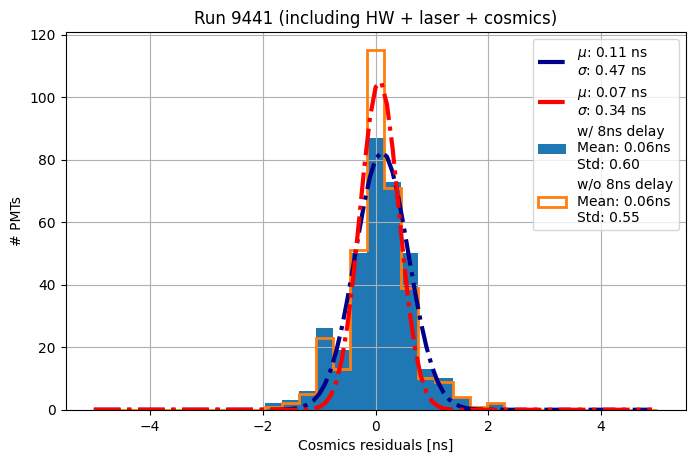

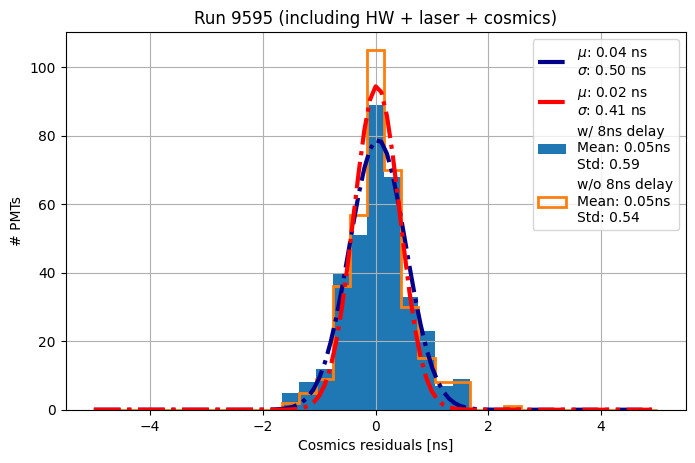

In [36]:
plot_fit(9441,dfc1,Ndfc1)
plot_fit(9595,dfc2,Ndfc2)

In [37]:
resc3 = "../output/residuals/Run_2/run9688_cosmics_timing_residuals_CORRw9730.csv"
resc4 = "../output/residuals/Run_2/run9764_cosmics_timing_residuals_CORRw9730.csv"
Nresc3 = "../output/residuals/Run_2/run9688_residuals_test8ns_CORRw9730.csv"
Nresc4 = "../output/residuals/Run_2/run9764_residuals_test8ns_CORRw9730.csv"
dfc3 = pd.read_csv(resc3)
dfc4 = pd.read_csv(resc4)
Ndfc3 = pd.read_csv(Nresc3)
Ndfc4 = pd.read_csv(Nresc4)

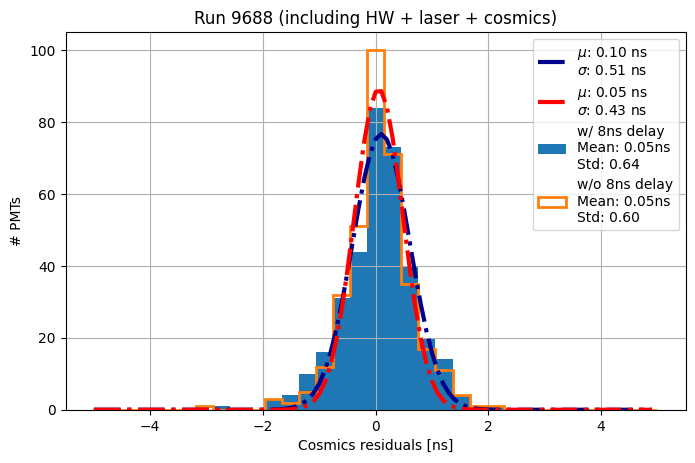

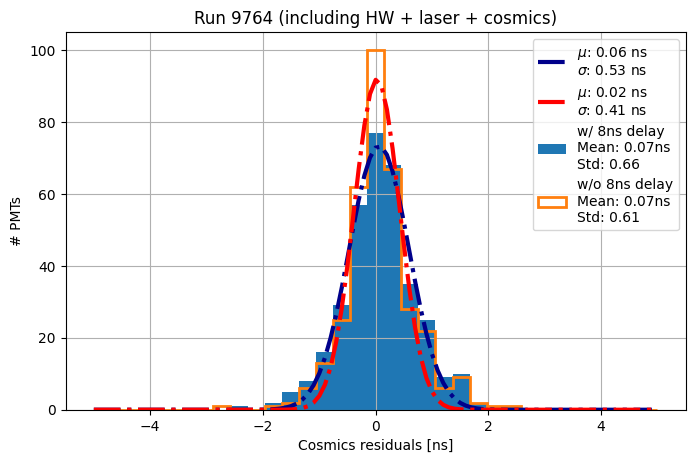

In [38]:
plot_fit(9688,dfc3,Ndfc3)
plot_fit(9764,dfc4,Ndfc4)

In [39]:
resc5 = "../output/residuals/Run_2/run9840_cosmics_timing_residuals_CORRw10085.csv"
resc6 = "../output/residuals/Run_2/run9974_cosmics_timing_residuals_CORRw10085.csv"
Nresc5 = "../output/residuals/Run_2/run9840_residuals_test8ns_CORRw10085.csv"
Nresc6 = "../output/residuals/Run_2/run9974_residuals_test8ns_CORRw10085.csv"
dfc5 = pd.read_csv(resc5)
dfc6 = pd.read_csv(resc6)
Ndfc5 = pd.read_csv(Nresc5)
Ndfc6 = pd.read_csv(Nresc6)

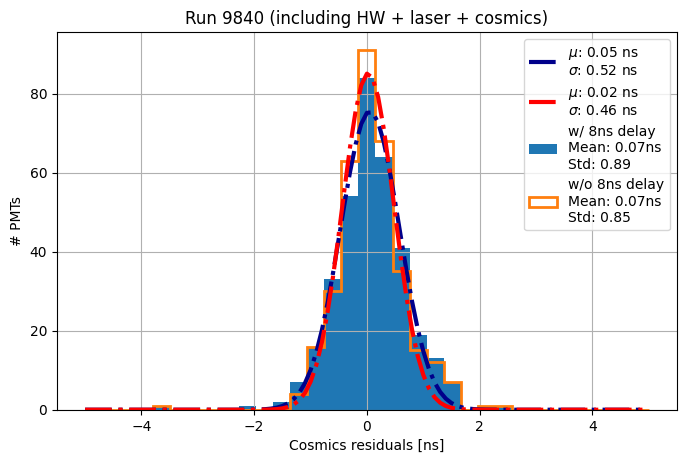

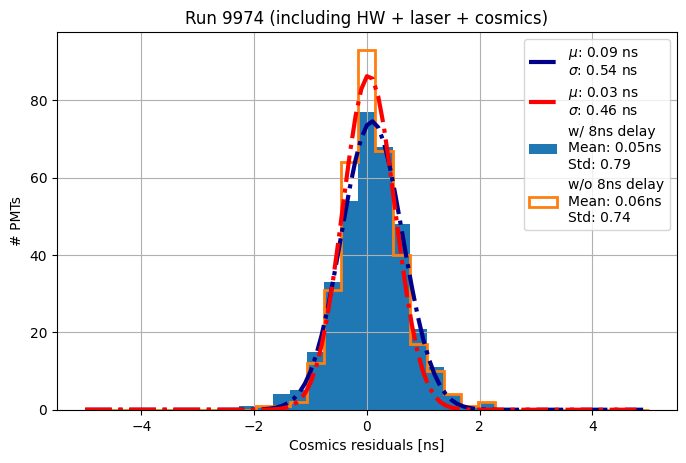

In [40]:
plot_fit(9840,dfc5,Ndfc5)
plot_fit(9974,dfc6,Ndfc6)